In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from copy import deepcopy

Load data

In [4]:
df = pd.read_csv("data/laptop_final.csv")
print(df.head(5))
print(df.columns)

                                                link  \
0  https://laptopmedia.com/laptop-specs/asus-rog-...   
1  https://laptopmedia.com/laptop-specs/asus-rog-...   
2  https://laptopmedia.com/laptop-specs/asus-rog-...   
3  https://laptopmedia.com/laptop-specs/asus-rog-...   
4  https://laptopmedia.com/laptop-specs/asus-rog-...   

                       name  Display Size  Resolution: width  \
0        ASUS ROG Strix G17          17.3             2560.0   
1  ASUS ROG Zephyrus Duo 16          16.0             2560.0   
2  ASUS ROG Zephyrus Duo 16          16.0             2560.0   
3  ASUS ROG Zephyrus Duo 16          16.0             2560.0   
4        ASUS ROG Strix G17          17.3             2560.0   

   Resolution: height  Refresh Rate       Panel Type  Disk Capacity  SSD  HDD  \
0              1440.0         240.0     IPS + G-Sync         2000.0  1.0  0.0   
1              1600.0         240.0   IPS + FreeSync        16000.0  1.0  0.0   
2              1600.0         240.0

In [5]:
# Easy to see that first name of each laptop is its brand name.
print(df["name"])

0               ASUS ROG Strix G17
1         ASUS ROG Zephyrus Duo 16
2         ASUS ROG Zephyrus Duo 16
3         ASUS ROG Zephyrus Duo 16
4               ASUS ROG Strix G17
                    ...           
289166               Acer Aspire 5
289167                       HP 17
289168           HP 17 (17-by4000)
289169                       HP 17
289170           HP 17 (17-by4000)
Name: name, Length: 289171, dtype: object


# EDA

# 1,In the same price segment, find the best laptop brand for work, gaming, display, portability, and total score

In [4]:
df1 = deepcopy(df)
df1.dropna(subset = ["Work Score","Play Score", "Portability Score","Display Score","Total Score", "Cost"], inplace = True)
df1 = df1[df1["Cost"]<=10000]

In [5]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7000, 10000]  # Adjust based on dataset

# Dynamically create labels for the ranges
labels = [f"${int(bins[i])}-${int(bins[i+1])}" if bins[i+1] != float('inf') else f"{int(bins[i])}+" 
          for i in range(len(bins) - 1)]

In [6]:
# Find the price segment
print(df1['Cost'].value_counts())
# Divide cost into quantile-based ranges
df1['Price Segment'] = pd.cut(df1['Cost'], bins=bins, labels=labels, right=False)  # right=False makes bins left-inclusive
# Check distribution
print(df1['Price Segment'].value_counts())

Cost
999.00     672
799.00     590
1199.00    578
899.00     563
849.00     527
          ... 
2305.00      1
2222.61      1
3899.77      1
5915.00      1
364.57       1
Name: count, Length: 6057, dtype: int64
Price Segment
$500-$1000      22668
$1000-$1500     19424
$1500-$2000     11366
$2000-$2500      4447
$3000-$5000      3275
$0-$500          2223
$2500-$3000      2172
$5000-$7000       463
$7000-$10000      141
Name: count, dtype: int64


In [7]:
#Extract the brand from the name.
df1['Brand'] = df1['name'].apply(lambda x : x.split()[0])

In [8]:
df1["Work Score"].head(10)

0     9.2
4     8.8
8     9.4
9     9.2
12    9.2
15    9.1
18    8.9
19    8.7
21    9.4
24    9.3
Name: Work Score, dtype: float64

In [9]:
grouped = df1.groupby(['Price Segment', 'Brand']).agg({
    'Work Score': 'mean',
    'Play Score': 'mean',
    'Display Score': 'mean',
    'Portability Score': 'mean',
    'Total Score': 'mean'
}).reset_index()

best_work = grouped.loc[grouped.groupby('Price Segment')['Work Score'].idxmax()]
best_play = grouped.loc[grouped.groupby('Price Segment')['Play Score'].idxmax()]
best_display = grouped.loc[grouped.groupby('Price Segment')['Display Score'].idxmax()]
best_port = grouped.loc[grouped.groupby('Price Segment')['Portability Score'].idxmax()]
best_total = grouped.loc[grouped.groupby('Price Segment')['Total Score'].idxmax()]

best_work['Category'] = 'Work'
best_work['Score'] = best_work['Work Score']

best_play['Category'] = 'Gaming'
best_play['Score'] = best_play['Play Score']

best_display['Category'] = 'Display'
best_display['Score'] = best_display['Display Score']

best_port['Category'] = 'Portability'
best_port['Score'] = best_port['Portability Score']

best_total['Category'] = 'General'
best_total['Score'] = best_total['Total Score']

best_brands = pd.concat([best_work, best_play, best_display,best_port, best_total]).reset_index(drop=True)
print(best_brands)

   Price Segment      Brand  Work Score  Play Score  Display Score  \
0        $0-$500         LG    5.600000    2.700000       8.000000   
1     $500-$1000   GIGABYTE    7.433333    7.522222       7.000000   
2    $1000-$1500      AORUS    7.825000    8.000000       8.125000   
3    $1500-$2000      AORUS    7.822222    8.200000       8.055556   
4    $2000-$2500  Alienware    8.008434    8.277108       7.481928   
5    $2500-$3000        MSI    8.116418    7.974925       7.685075   
6    $3000-$5000  Alienware    8.542857    9.087755       7.632653   
7    $5000-$7000      Razer    9.133333    9.733333       8.500000   
8   $7000-$10000  Alienware    9.300000    9.800000       7.000000   
9        $0-$500        MSI    5.400000    3.966667       7.666667   
10    $500-$1000   GIGABYTE    7.433333    7.522222       7.000000   
11   $1000-$1500      AORUS    7.825000    8.000000       8.125000   
12   $1500-$2000      AORUS    7.822222    8.200000       8.055556   
13   $2000-$2500  Al

In [10]:
# Assuming 'Price Segment' is ordered, select the first two bins
first_two_bins = best_brands['Price Segment'].unique()[1:6]

# Filter the DataFrame to include only the first two price bins
filtered_brands = best_brands[best_brands['Price Segment'].isin(first_two_bins)]


fig = px.bar(
    filtered_brands,
    x="Price Segment",
    y="Score",
    color="Category",
    text="Brand",
    title="Best Brand by Price Segment and Category",
    labels={"Score": "Average Score", "Price Segment": "Price Range", "Category": "Purpose"},
    hover_data={"Brand": True},
    color_discrete_sequence=px.colors.qualitative.Set2,
    height=500,
    barmode ='group'
)
fig.update_traces(textposition='outside')
fig.update_layout(
    font=dict(size=14),
    title_font=dict(size=18),
    legend=dict(title="Category", font_size=12),
    xaxis=dict(title="Price Segment", tickfont_size=12),
    yaxis=dict(title="Average Score", tickfont_size=12),
)
fig.show()

In [11]:
print(grouped.head(3))

  Price Segment  Brand  Work Score  Play Score  Display Score  \
0       $0-$500  AORUS         NaN         NaN            NaN   
1       $0-$500   ASUS    4.413732    2.081338       5.329225   
2       $0-$500   Acer    4.236134    1.850420       7.222689   

   Portability Score  Total Score  
0                NaN          NaN  
1           7.286268     4.374648  
2           7.476471     4.757983  


In [12]:
segment = '$1500-$2000'
task = 'Play Score'
filtered_data = grouped[grouped["Price Segment"] == segment][["Brand", task]].sort_values(by = task, ascending = False)
filtered_data.rename(columns={task: "Score"}, inplace=True)

fig_task_all = px.bar(
    filtered_data,
    x="Brand",
    y="Score",
    text="Score",
    title=f"Average {task.replace(' Score', '')} Score by Brand in {segment} Price Segment",
    labels={"Score": "Average Score", "Brand": "Brand"},
    color="Brand",  
    height=700,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig_task_all.update_traces(textposition="outside",texttemplate = "%{text:.2f}")
fig_task_all.update_layout(
    font=dict(size=14),
    title_font=dict(size=18),
    legend=dict(title="Brand", font_size=12),
    xaxis=dict(title="Brand", tickfont_size=12),
    yaxis=dict(title="Average Score", tickfont_size=12)
)

fig_task_all.show()

In [15]:
current_brand = "Acer"
segment = '$1500-$2000'
task = 'Play Score'

In [16]:
dfx = deepcopy(df)
dfx.dropna(subset = ["Work Score","Play Score", "Portability Score","Display Score","Total Score", "Cost"], inplace = True)
dfx = dfx[dfx["Cost"]<=10000]

bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7000, 10000]  # Adjust based on dataset

# Dynamically create labels for the ranges
labels = [f"${int(bins[i])}-${int(bins[i+1])}" if bins[i+1] != float('inf') else f"{int(bins[i])}+" 
          for i in range(len(bins) - 1)]

# Find the price segment
print(dfx['Cost'].value_counts())
# Divide cost into quantile-based ranges
dfx['Price Segment'] = pd.cut(dfx['Cost'], bins=bins, labels=labels, right=False)  # right=False makes bins left-inclusive
# Check distribution
print(dfx['Price Segment'].value_counts())

#Extract the brand from the name.
dfx['Brand'] = dfx['name'].apply(lambda x : x.split()[0])

dfx = dfx[dfx['Brand']==current_brand]

dfx["Brand product line"] = dfx["name"].apply(lambda x : x.split()[1])

grouped = dfx.groupby(['Price Segment', 'Brand product line']).agg({
    'Work Score': 'mean',
    'Play Score': 'mean',
    'Display Score': 'mean',
    'Portability Score': 'mean',
    'Total Score': 'mean'
}).reset_index()
grouped = grouped.astype({'Price Segment': 'str', 'Brand product line': 'str'})

grouped.fillna(0,inplace=True)

best_work = grouped.loc[grouped.groupby('Price Segment')['Work Score'].idxmax()]
best_play = grouped.loc[grouped.groupby('Price Segment')['Play Score'].idxmax()]
best_display = grouped.loc[grouped.groupby('Price Segment')['Display Score'].idxmax()]
best_port = grouped.loc[grouped.groupby('Price Segment')['Portability Score'].idxmax()]
best_total = grouped.loc[grouped.groupby('Price Segment')['Total Score'].idxmax()]

best_work['Category'] = 'Work'
best_work['Score'] = best_work['Work Score']

best_play['Category'] = 'Gaming'
best_play['Score'] = best_play['Play Score']

best_display['Category'] = 'Display'
best_display['Score'] = best_display['Display Score']

best_port['Category'] = 'Portability'
best_port['Score'] = best_port['Portability Score']

best_total['Category'] = 'General'
best_total['Score'] = best_total['Total Score']

best_brands = pd.concat([best_work, best_play, best_display,best_port, best_total]).reset_index(drop=True)

filtered_data = grouped[grouped["Price Segment"] == segment][["Brand product line", task]].sort_values(by = task, ascending = False)
filtered_data.rename(columns={task: "Score"}, inplace=True)

fig_task_all = px.bar(
    filtered_data,
    x="Brand product line",
    y="Score",
    text="Score",
    title=f"Average {task.replace(' Score', '')} Score by Product Line in {segment} Price Segment of {current_brand}",
    labels={"Score": "Average Score", "Brand product Line": "Brand product line"},
    color="Brand product line",  
    height=700,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig_task_all.update_traces(textposition="outside",texttemplate = "%{text:.2f}")
fig_task_all.update_layout(
    font=dict(size=14),
    title_font=dict(size=18),
    legend=dict(title="Product Line", font_size=12),
    xaxis=dict(title="Product Line", tickfont_size=12),
    yaxis=dict(title="Average Score", tickfont_size=12)
)

fig_task_all.show()

Cost
999.00     672
799.00     590
1199.00    578
899.00     563
849.00     527
          ... 
2305.00      1
2222.61      1
3899.77      1
5915.00      1
364.57       1
Name: count, Length: 6057, dtype: int64
Price Segment
$500-$1000      22668
$1000-$1500     19424
$1500-$2000     11366
$2000-$2500      4447
$3000-$5000      3275
$0-$500          2223
$2500-$3000      2172
$5000-$7000       463
$7000-$10000      141
Name: count, dtype: int64


# 2,Mean cost for each point ranges in laptop

In [30]:
df2 = deepcopy(df)

C:\Users\tungv\AppData\Local\Temp\ipykernel_6972\1645874869.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



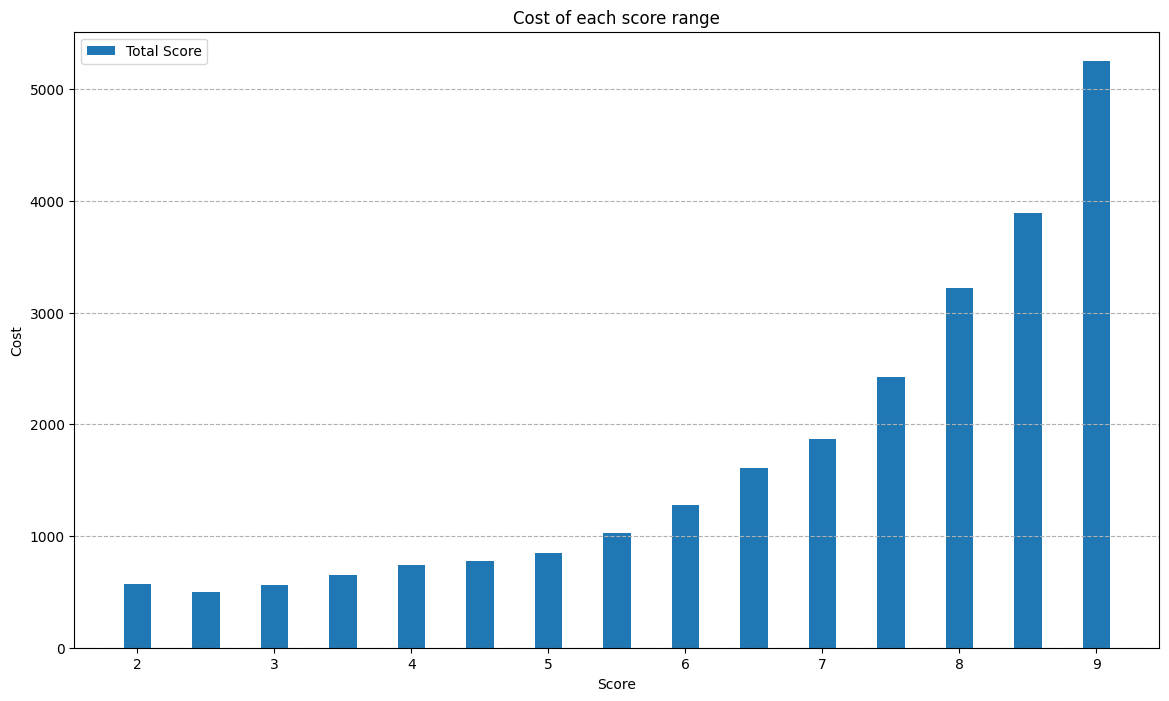

C:\Users\tungv\AppData\Local\Temp\ipykernel_6972\1645874869.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



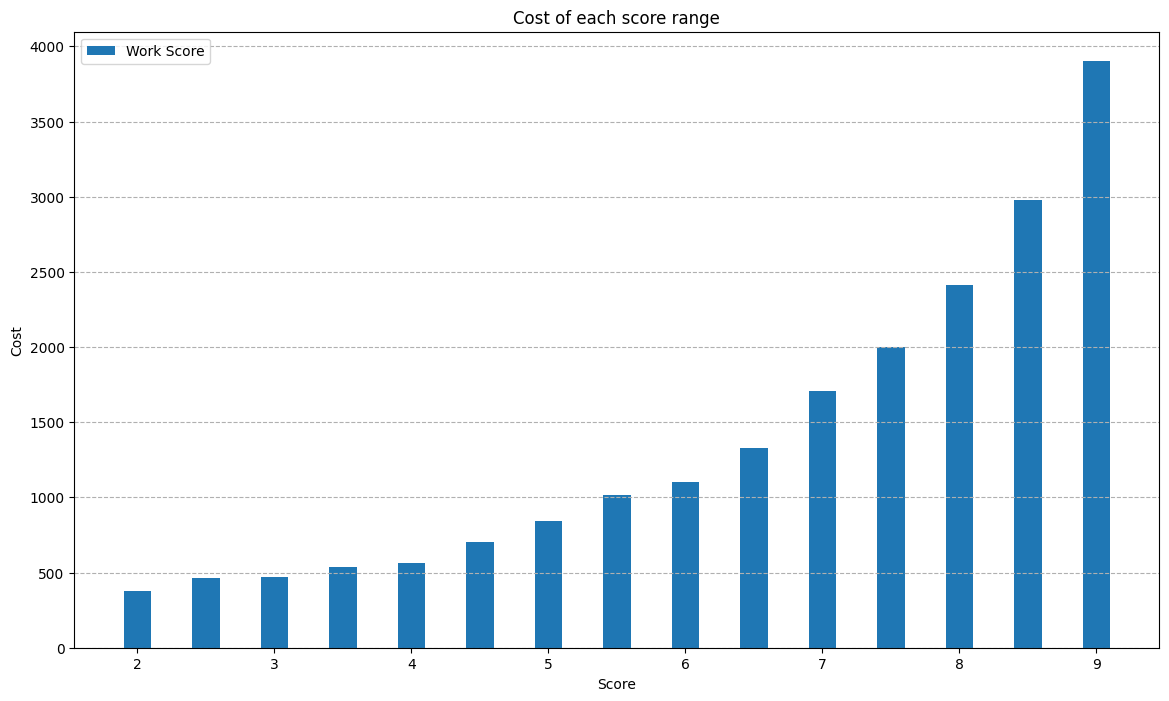

C:\Users\tungv\AppData\Local\Temp\ipykernel_6972\1645874869.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



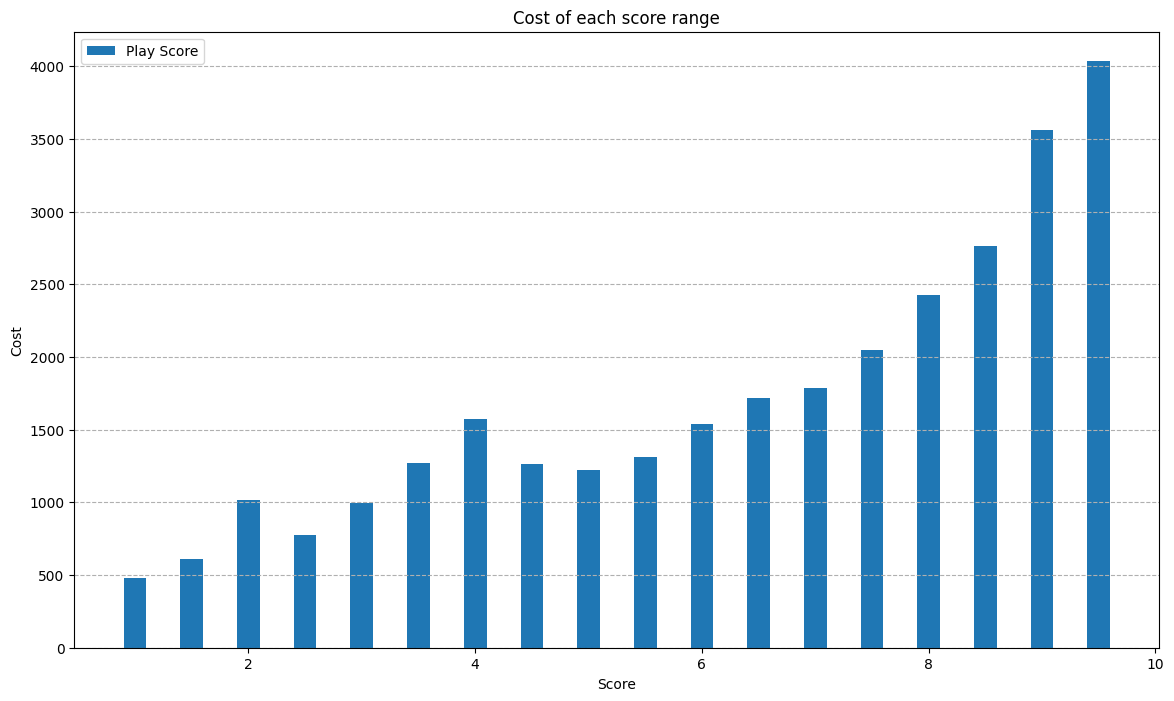

C:\Users\tungv\AppData\Local\Temp\ipykernel_6972\1645874869.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



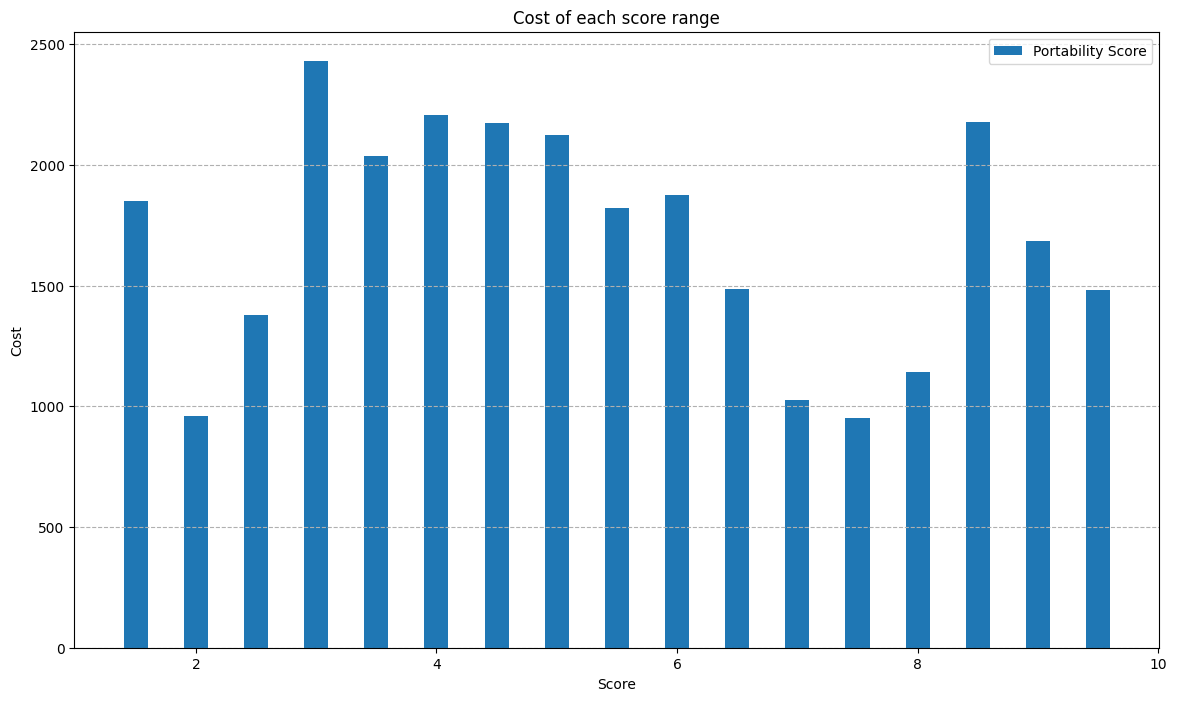

C:\Users\tungv\AppData\Local\Temp\ipykernel_6972\1645874869.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



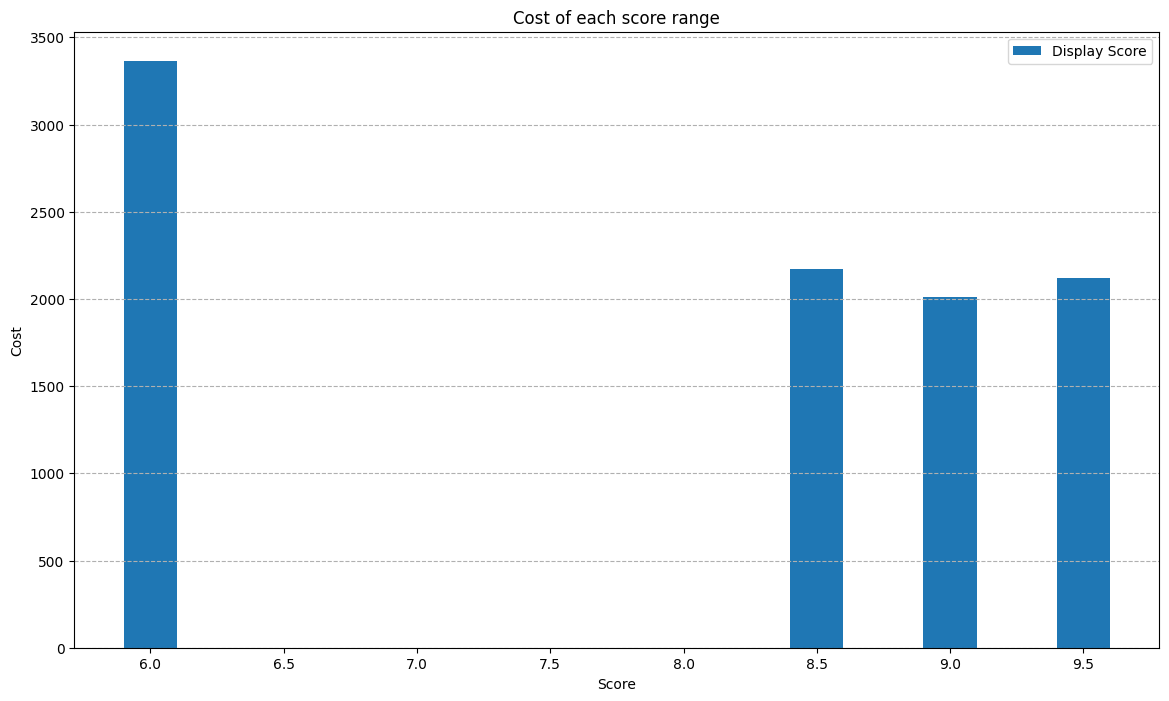

In [31]:
# Example DataFrame
df2 = df2[~df["Cost"].isna()]
df2 = df2[df2["Cost"]<=10000]

def calculate_cost_by_bins(df2, score_column, bin_width=0.5, range_min=0, range_max=10):
    # Create bins
    bins = np.arange(range_min, range_max + bin_width, bin_width)
    df2[f"{score_column} Bin"] = pd.cut(df2[score_column], bins=bins, right=False)
    # Group by bins and calculate mean price
    grouped = df2.groupby(f"{score_column} Bin")["Cost"].mean().reset_index()
    grouped["Bin Midpoint"] = grouped[f"{score_column} Bin"].apply(lambda x: x.left) 
    # Calculate cost to increase
    grouped["Cost to Increase"] = grouped["Cost"].diff()
    return grouped.dropna()  # Drop rows with NaN (first row doesn't have a previous bin)
# Plot results for all score types
score_types = ["Total Score", "Work Score", "Play Score", "Portability Score", "Display Score"]
bar_width = 0.2  # Width of each bar
# Plot bar plots for each score type
for i, score_column in enumerate(score_types):
    df2_drop = df2.dropna(subset=[score_column])
    cost_data = calculate_cost_by_bins(df2_drop, score_column)
    plt.figure(figsize=(14, 8))
    plt.bar(cost_data["Bin Midpoint"].to_numpy(), 
            cost_data["Cost"], 
            width=bar_width, 
            label=score_column)
    plt.title("Cost of each score range")
    plt.xlabel("Score")
    plt.ylabel("Cost")
    plt.legend()
    plt.grid(axis="y", linestyle="--")
    plt.show()

# 3, Collect all laptop brands available, find the highest and lowest-priced laptop for each brand.

In [32]:
df3 = deepcopy(df)
df3.dropna(subset = ['Cost','name'], inplace = True)
df3 = df3[df3["Cost"]<=12000]

In [33]:
df3['Brand'] = df3['name'].apply(lambda x : x.split()[0])
# Group by Brand and calculate highest and lowest price
brand_prices = df3.groupby('Brand')['Cost'].agg(['max', 'min']).reset_index()
brand_prices.rename(columns={'max': 'Highest Price', 'min': 'Lowest Price'}, inplace=True)

In [34]:
# Find laptops with the highest and lowest prices for each brand
highest_priced_laptops = df3.loc[df3.groupby('Brand')['Cost'].idxmax()]
lowest_priced_laptops = df3.loc[df3.groupby('Brand')['Cost'].idxmin()]
# Merge results
brand_price_details = brand_prices.copy()
brand_price_details['Highest Priced Laptop'] = highest_priced_laptops['name'].values
brand_price_details['Lowest Priced Laptop'] = lowest_priced_laptops['name'].values
drop_dell = brand_price_details.drop(4)

In [35]:
df_melted = drop_dell.melt(id_vars=['Brand', 'Highest Priced Laptop', 'Lowest Priced Laptop'], 
                    value_vars=['Highest Price', 'Lowest Price'], 
                    var_name='Price Type', 
                    value_name='Price')
fig = px.bar(
    df_melted, 
    x="Brand", 
    y="Price", 
    color="Price Type", 
    text="Price", 
    hover_data=["Highest Priced Laptop", "Lowest Priced Laptop"], 
    labels={"Price": "Price (in USD)", "Brand": "Laptop Brand", "Price Type": "Price Type"},
    title="Highest and Lowest Prices by Laptop Brand",
    color_discrete_map={"Highest Price": "orange", "Lowest Price": "blue"},
    height=500
)
fig.show()


# 4,  Plot price and performance of GPU and CPU brands

In [28]:
df4 = deepcopy(df)

In [30]:
# Load and clean the data
df4 = df4[df4["Cost"]<=12000]
df4 = df4.dropna(subset = ["Cost","Total Score", "GPU: Architecture","CPU: Codename"])


df4["Combined Architecture"] = df4["CPU: Codename"] + " + " + df4["GPU: Architecture"]
# Extract the release years for CPU and GPU
df4["CPU Release Year"] = df4["CPU: Release quarter"].apply(lambda x: int(str(x).split('.')[0]))
df4["GPU Release Year"] = df4["GPU: Release quarter"].apply(lambda x: int(str(x).split('.')[0]))

# Use the later release year between CPU and GPU
df4["Release Year"] = df4[["CPU Release Year", "GPU Release Year"]].max(axis=1)
# Function to process and plot data for combined architecture with Plotly
def process_and_plot_combined_plotly(df4, group_column, score_column, title):
    # Group by the specified column
    grouped = df4.groupby(group_column).agg(
        Release_Year_Mode=("Release Year", lambda x: x.mode()[0]),  # Mode of release year
        Mean_Cost=("Cost", "mean"),  # Mean cost
        Mean_Score=(score_column, "mean")  # Mean score for the selected type
    ).reset_index()
    # Create interactive scatter plot
    fig = px.scatter(
        grouped,
        x="Mean_Score", 
        y="Mean_Cost",  
        color="Release_Year_Mode",
        # color_continuous_scale="Viridis",
        color_discrete_sequence=px.colors.qualitative.Set1,
        hover_name=group_column,  # Show the name of the architecture on hover
        labels={"Mean_Cost": "Mean Cost", "Mean_Score": f"Mean {score_column}", "Release_Year_Mode": "Release Year"},
        title=title
    )
    fig.update_layout(
        title=title,
        xaxis_title=f"Mean {score_column}",  # Adjusted axis label
        yaxis_title="Mean Cost",  # Adjusted axis label
        coloraxis_colorbar=dict(title="Release Year"),
        autosize=False,
        width=1280,  # 16:9 width
        height=720   # 16:9 height
    )
    fig.show()

# List of score types
score_types = ["Total Score", "Work Score", "Play Score"]

# Plot for combined architecture
for score in score_types:
    process_and_plot_combined_plotly(
        df4,
        "Combined Architecture",
        score,
        f"Combined Architecture: {score} vs Cost by Release Year"
    )

# 5, Certain brands dominate specific price or performance bins

In [25]:
df5 = deepcopy(df)

<Figure size 1200x800 with 0 Axes>

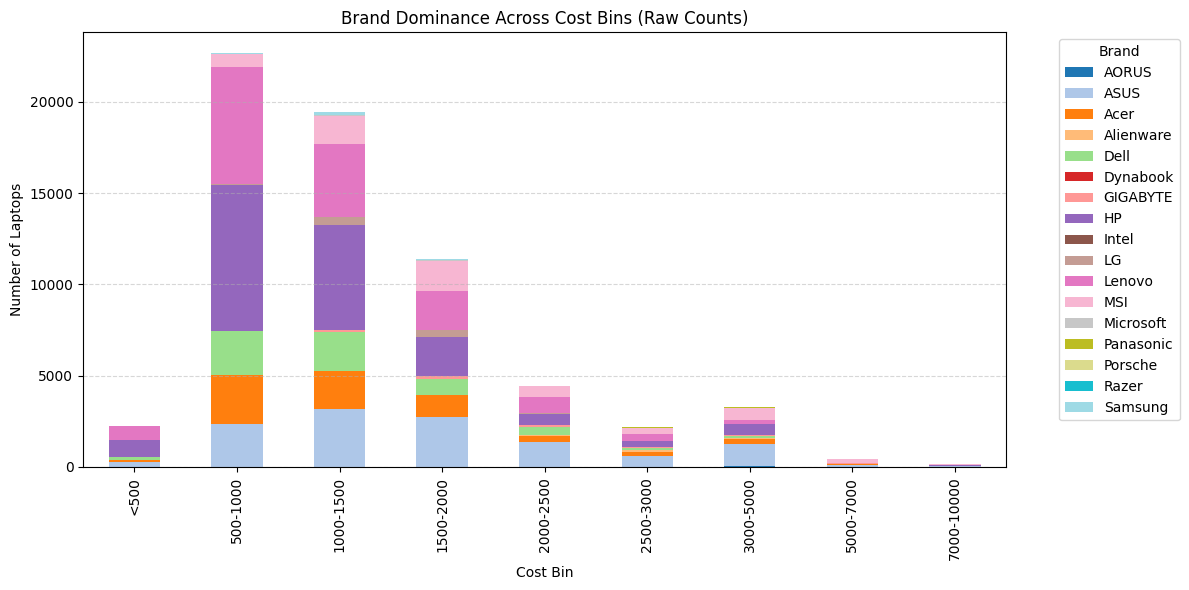

<Figure size 1200x800 with 0 Axes>

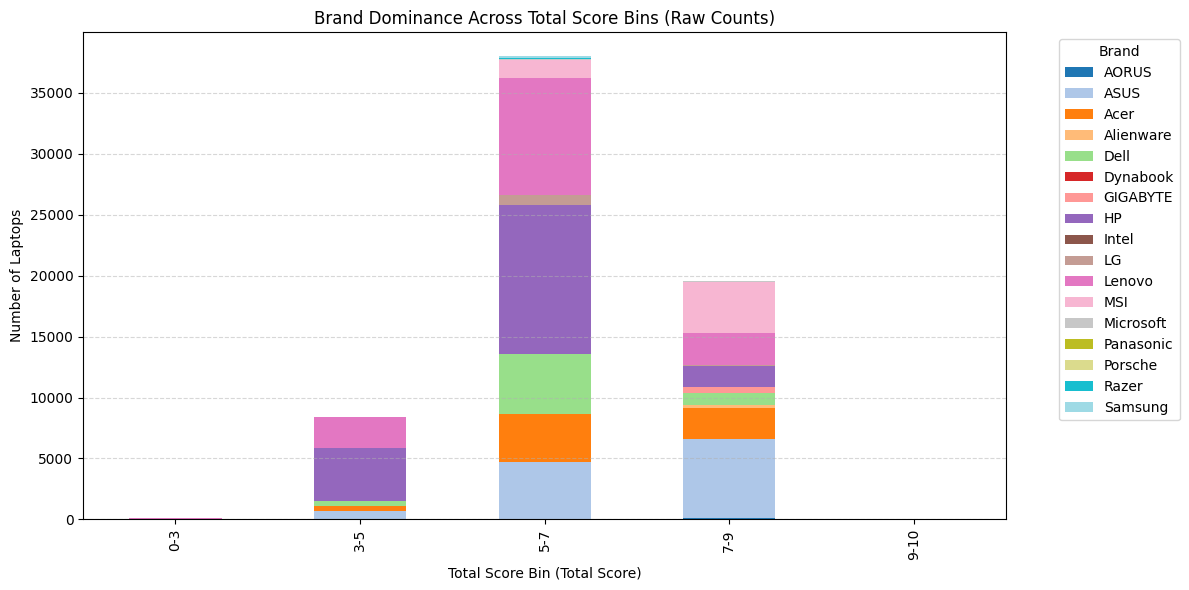

<Figure size 1200x800 with 0 Axes>

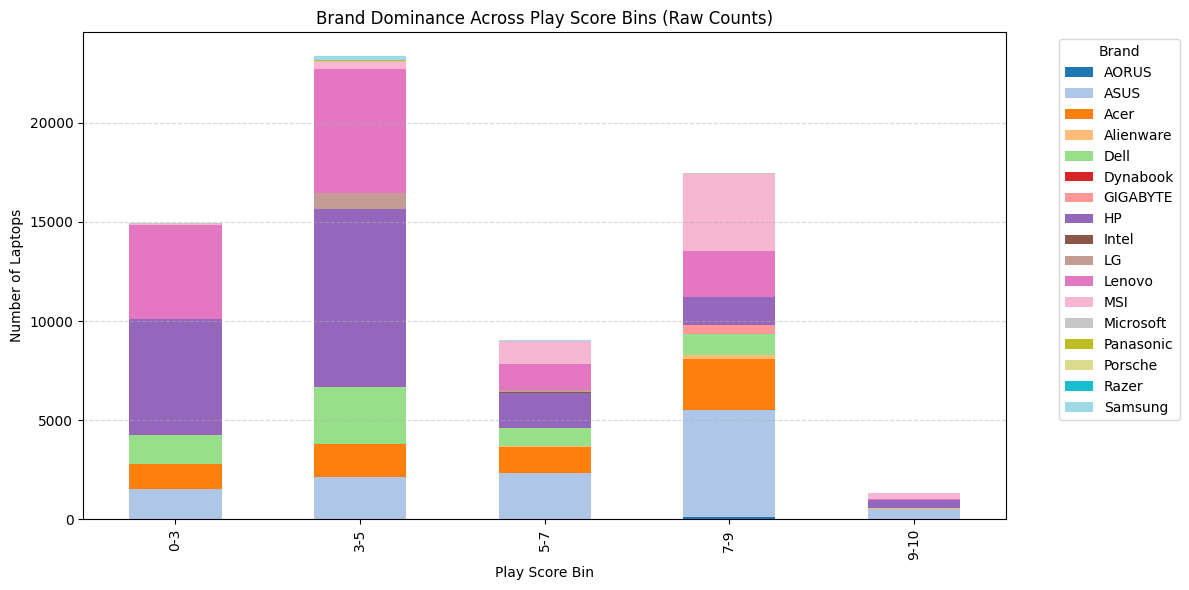

<Figure size 1200x800 with 0 Axes>

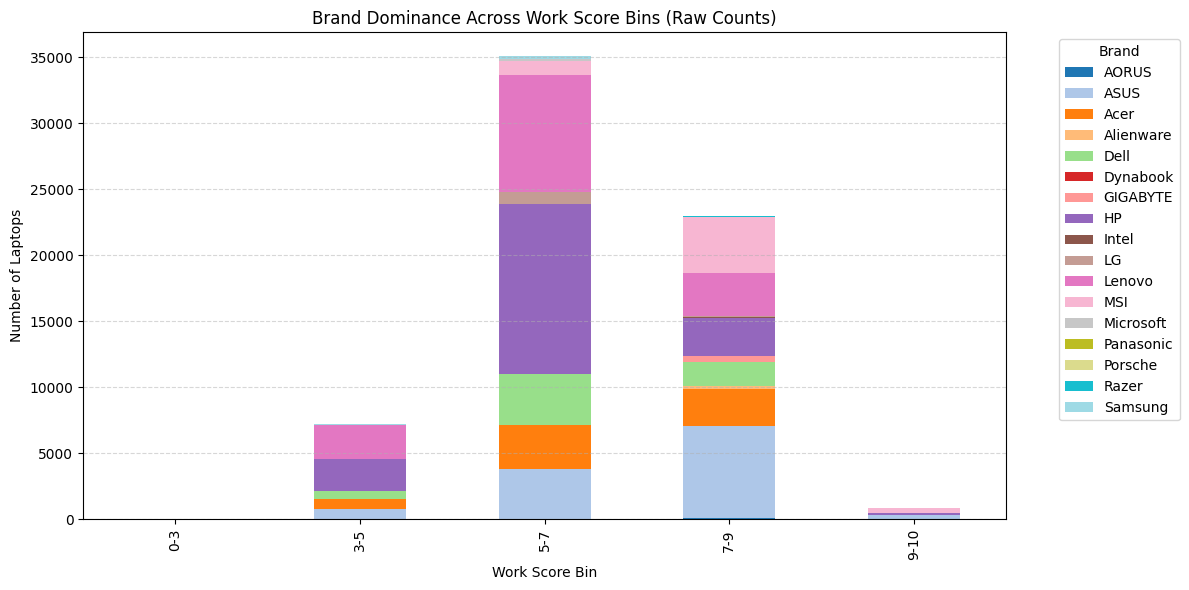

<Figure size 1200x800 with 0 Axes>

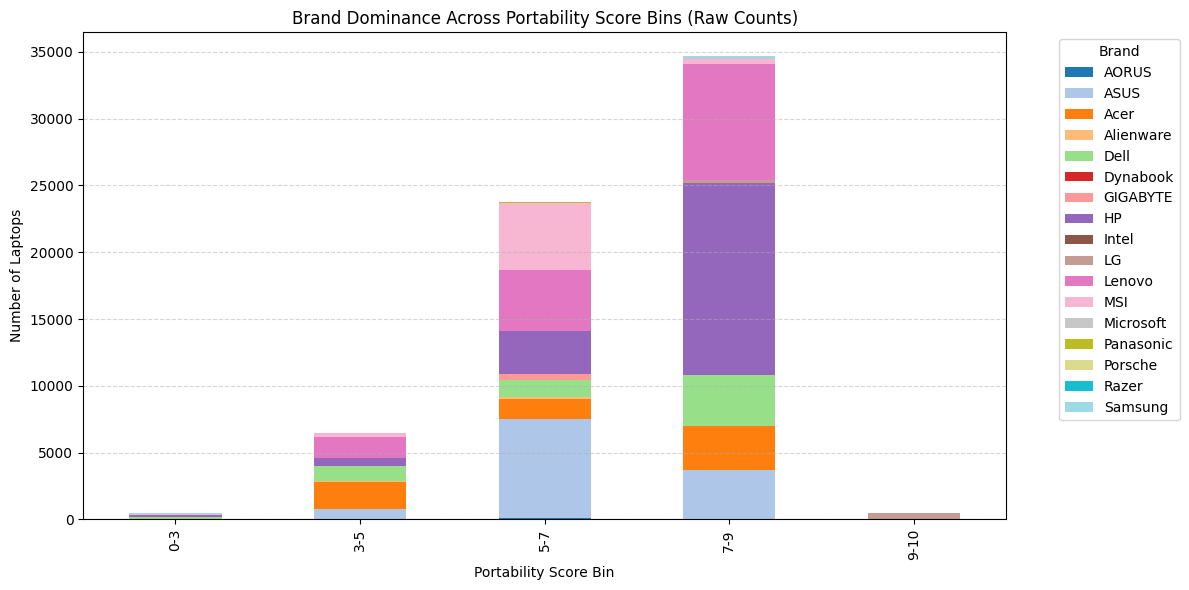

<Figure size 1200x800 with 0 Axes>

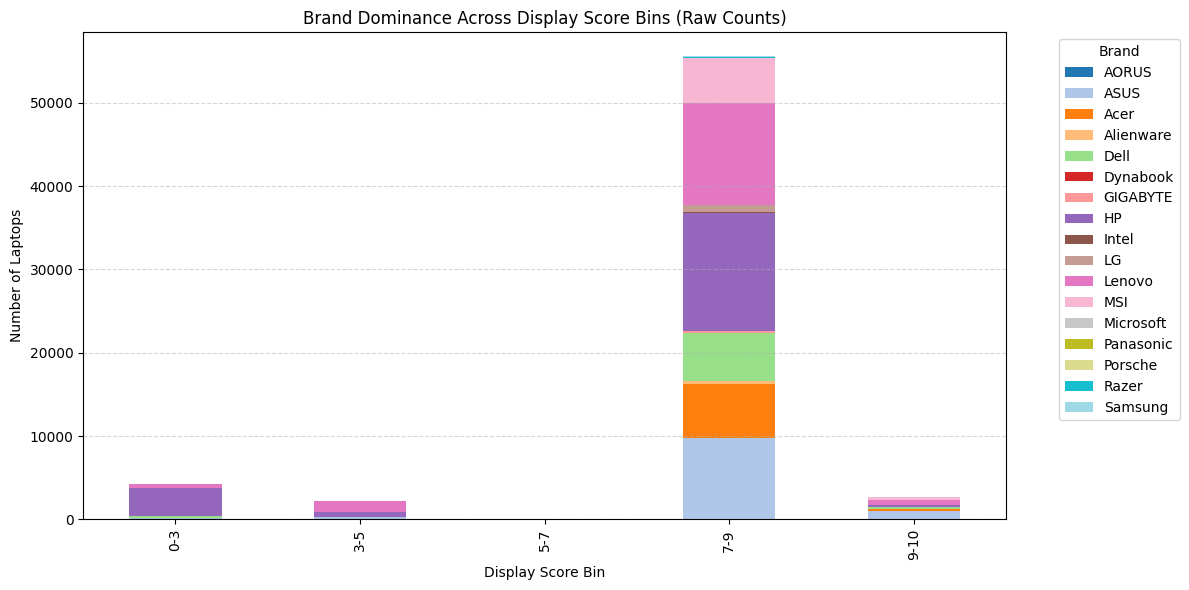

In [26]:
# Load and clean the data
df5 = df5.dropna(subset = ["Cost","Total Score"])
df5["Brand"] = df5["name"].apply(lambda a: a.split()[0])

# Define bins for cost and score
cost_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7000, 10000]  # Adjust based on dataset
score_bins = [0, 3, 5, 7, 9, 10]  # Adjust based on dataset
cost_labels = ["<500", "500-1000", "1000-1500", "1500-2000", "2000-2500", "2500-3000", "3000-5000", "5000-7000", "7000-10000"]
score_labels = ["0-3", "3-5", "5-7", "7-9", "9-10"]

# Bin the data
df5["Cost Bin"] = pd.cut(df5["Cost"], bins=cost_bins, labels=cost_labels, right=False)
df5["Total Score Bin"] = pd.cut(df5["Total Score"], bins=score_bins, labels=score_labels, right=False)
df5["Play Score Bin"] = pd.cut(df5["Play Score"], bins=score_bins, labels=score_labels, right=False)
df5["Work Score Bin"] = pd.cut(df5["Work Score"], bins=score_bins, labels=score_labels, right=False)
df5["Poratbility Score Bin"] = pd.cut(df5["Portability Score"], bins=score_bins, labels=score_labels, right=False)
df5["Display Score Bin"] = pd.cut(df5["Display Score"], bins=score_bins, labels=score_labels, right=False)


# Group by Brand and Bin
brand_cost_dist = df5.groupby(["Brand", "Cost Bin"]).size().unstack(fill_value=0)
brand_score_dist = df5.groupby(["Brand", "Total Score Bin"]).size().unstack(fill_value=0)
brand_play_score_dist = df5.groupby(["Brand", "Play Score Bin"]).size().unstack(fill_value=0)
brand_work_score_dist = df5.groupby(["Brand", "Work Score Bin"]).size().unstack(fill_value=0)
brand_portability_score_dist = df5.groupby(["Brand", "Poratbility Score Bin"]).size().unstack(fill_value=0)
brand_display_score_dist = df5.groupby(["Brand", "Display Score Bin"]).size().unstack(fill_value=0)

# Normalize within bins
brand_cost_dist_normalized = brand_cost_dist.div(brand_cost_dist.sum(axis=0), axis=1) * 100
brand_score_dist_normalized = brand_score_dist.div(brand_score_dist.sum(axis=0), axis=1) * 100
brand_play_score_dist_normalized = brand_play_score_dist.div(brand_play_score_dist.sum(axis=0), axis=1 ) * 100
brand_work_score_dist_normalized = brand_work_score_dist.div(brand_work_score_dist.sum(axis=0), axis=1) * 100
brand_portability_score_dist_normalized = brand_portability_score_dist.div(brand_portability_score_dist.sum(axis=0), axis=1) * 100
brand_display_score_dist_normalized = brand_display_score_dist.div(brand_display_score_dist.sum(axis=0), axis=1) * 100

colormap = sns.color_palette("Set2", n_colors=len(brand_cost_dist_normalized.columns))

# # Plot brand dominance by cost bin
# plt.figure(figsize=(12, 8))
# brand_cost_dist_normalized.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
# plt.title("Brand Dominance Across Cost Bins")
# plt.xlabel("Cost Bin")
# plt.ylabel("Percentage of Laptops")
# plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.grid(axis="y", linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

# # Plot brand dominance by Total Score Bin
# plt.figure(figsize=(12, 8))
# brand_score_dist_normalized.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
# plt.title("Brand Dominance Across Total Score Bins")
# plt.xlabel("Total Score Bin (Total Score)")
# plt.ylabel("Percentage of Laptops")
# plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.grid(axis="y", linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

# # Plot brand dominance by Play Score Bin
# plt.figure(figsize=(12, 8))
# brand_play_score_dist_normalized.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
# plt.title("Brand Dominance Across Play Score Bins")
# plt.xlabel("Play Score Bin")
# plt.ylabel("Percentage of Laptops")
# plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.grid(axis="y", linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

# # Plot brand dominance by Work Score
# plt.figure(figsize=(12, 8))
# brand_work_score_dist_normalized.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
# plt.title("Brand Dominance Across Work Score Bins")
# plt.xlabel("Work Score Bin")
# plt.ylabel("Percentage of Laptops")
# plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.grid(axis="y", linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

# # Plot brand dominance by Portability Score
# plt.figure(figsize=(12, 8))
# brand_portability_score_dist_normalized.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
# plt.title("Brand Dominance Across Portability Score Bins")
# plt.xlabel("Portability Score Bin")
# plt.ylabel("Percentage of Laptops")
# plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.grid(axis="y", linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

# # Plot brand dominance by Display Score
# plt.figure(figsize=(12, 8))
# brand_display_score_dist_normalized.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
# plt.title("Brand Dominance Across Display Score Bins")
# plt.xlabel("Display Score Bin")
# plt.ylabel("Percentage of Laptops")
# plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.grid(axis="y", linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

# Plot brand dominance by cost bin (raw counts)
plt.figure(figsize=(12, 8))
brand_cost_dist.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
plt.title("Brand Dominance Across Cost Bins (Raw Counts)")
plt.xlabel("Cost Bin")
plt.ylabel("Number of Laptops")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot brand dominance by Total Score Bin (raw counts)
plt.figure(figsize=(12, 8))
brand_score_dist.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
plt.title("Brand Dominance Across Total Score Bins (Raw Counts)")
plt.xlabel("Total Score Bin (Total Score)")
plt.ylabel("Number of Laptops")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot brand dominance by Play Score Bin (raw counts)
plt.figure(figsize=(12, 8))
brand_play_score_dist.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
plt.title("Brand Dominance Across Play Score Bins (Raw Counts)")
plt.xlabel("Play Score Bin")
plt.ylabel("Number of Laptops")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot brand dominance by Work Score (raw counts)
plt.figure(figsize=(12, 8))
brand_work_score_dist.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
plt.title("Brand Dominance Across Work Score Bins (Raw Counts)")
plt.xlabel("Work Score Bin")
plt.ylabel("Number of Laptops")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot brand dominance by Portability Score (raw counts)
plt.figure(figsize=(12, 8))
brand_portability_score_dist.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
plt.title("Brand Dominance Across Portability Score Bins (Raw Counts)")
plt.xlabel("Portability Score Bin")
plt.ylabel("Number of Laptops")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot brand dominance by Display Score (raw counts)
plt.figure(figsize=(12, 8))
brand_display_score_dist.T.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 6))
plt.title("Brand Dominance Across Display Score Bins (Raw Counts)")
plt.xlabel("Display Score Bin")
plt.ylabel("Number of Laptops")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 6, Price over the specific-task laptops(laptops that have specific score in the top 5-10% largest)

In [40]:
df6 = deepcopy(df)
df6["Brand"] = df6["name"].apply(lambda a: a.split()[0])

In [41]:
specific_score_column = 'Play Score'
top_5_percent_threshold = df6[specific_score_column].quantile(0.95)
top_10_percent_threshold = df6[specific_score_column].quantile(0.90)
top_5_percent_laptops = df6[df6[specific_score_column] >= top_5_percent_threshold]
top_10_percent_laptops = df6[df6[specific_score_column] >= top_10_percent_threshold]
fig_5 = px.histogram(top_5_percent_laptops, 
                      x='Cost', 
                      title=f'Cost Distribution of Laptops with Top 5% {specific_score_column}',
                      labels={'Cost': 'Cost (USD)', f'{specific_score_column}': f'Top 5% {specific_score_column}'},
                      color='Brand',
                      color_discrete_sequence=px.colors.qualitative.Set2)
fig_10 = px.histogram(top_10_percent_laptops, 
                       x='Cost', 
                       title=f'Cost Distribution of Laptops with Top 10% {specific_score_column}',
                       labels={'Cost': 'Cost (USD)', f'{specific_score_column}': f'Top 10% {specific_score_column}'},
                       color='Brand',
                       color_discrete_sequence=px.colors.qualitative.Set2)
fig_5.show()
fig_10.show()

In [42]:
score_columns = ['Play Score', 'Work Score', 'Portability Score','Display Score','Total Score']
top_5_mean_prices = {}
for score_column in score_columns:
    top_5_percent_threshold = df6[score_column].quantile(0.95)
    top_5_laptops = df6[df6[score_column] >= top_5_percent_threshold]
    mean_price = top_5_laptops['Cost'].mean()
    top_5_mean_prices[score_column] = mean_price
top_5_prices_df = pd.DataFrame(list(top_5_mean_prices.items()), columns=['Score Type', 'Mean Price'])
fig = px.bar(top_5_prices_df,
             x='Score Type', 
             y='Mean Price',
             title="Mean Price of Laptops in Top 5% for Each Score",
             labels={'Mean Price': 'Mean Price (USD)', 'Score Type': 'Score Type'},
             color='Score Type',
             color_discrete_sequence=px.colors.qualitative.Set2,
             height=400)
fig.show()